In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *

from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

from numpy.random import *
from random import randint, random

from sklearn import metrics




[-99.5473528  -93.95536617 -87.98254497 -82.36011588 -76.92802912
 -71.37916559 -65.70648821 -59.76990103 -53.45328057 -47.88893093
 -42.02507071 -36.28072852 -30.34693385 -25.14837722 -19.20576381
 -13.21235222  -7.6677573   -1.1805875    4.55175225   9.93268717] 
 [1.00000207e+04 8.87593800e+03 7.81795055e+03 6.82846922e+03
 5.90448720e+03 5.04881368e+03 4.25943327e+03 3.53682334e+03
 2.88235044e+03 2.29360425e+03 1.77303602e+03 1.31839724e+03
 9.32136760e+02 6.11489059e+02 3.59372071e+02 1.73041835e+02
 5.43839020e+01 2.33603494e+00 1.77630828e+01 1.00052219e+02]


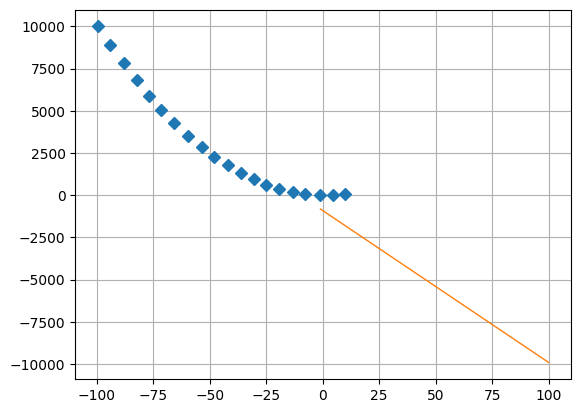

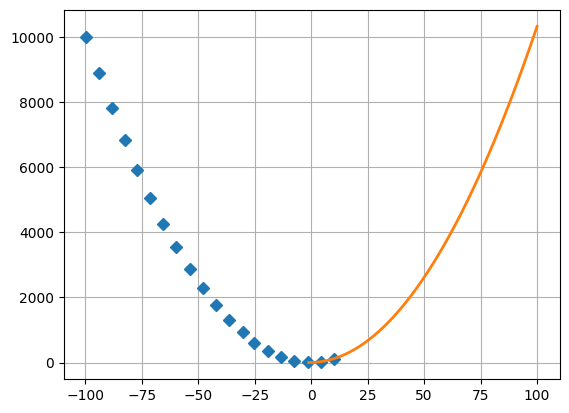

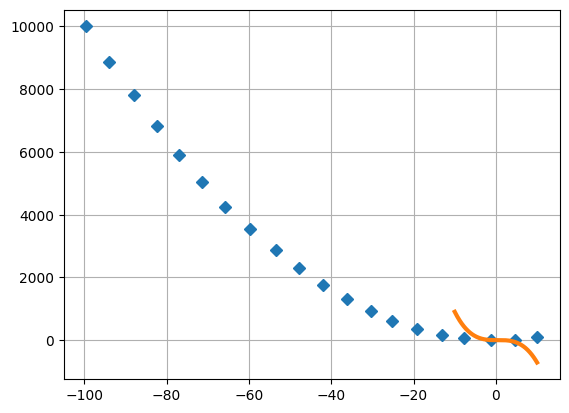

In [19]:
#Задание:
#Представьте собственные данные и постройте эктраполяцию полиномами
#первой, второй и третьей степени.

#1

x = linspace(-100,10,20)
y = x**2+1*(rand(20)-0.5)
x+=1*(rand(20)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')


print(x,'\n',y)

m = vstack((x, ones(20))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_2 = linspace(-1,100,50)

plt.plot(x,y,'D')

plt.plot(x_2, s[0]* x_2 + s[1], '-', lw=1)
plt.grid()

plt.savefig('Полином 1-й степени.png')
plt.show()


m = vstack((x, x**2, ones(20))).T

s = np.linalg.lstsq(m,y,rcond = None)[0]

#2

plt.plot(x,y,'D')

plt.plot(x_2, s[0]* x_2 + s[1]*x_2**2 + s[2], '-', lw=2)

plt.grid()

plt.savefig('Полином 2-й степени.png')

plt.show()


#3

m = vstack((x, x**2, x**3, ones(20))).T

s = np.linalg.lstsq(m,y,rcond = None)[0]

x_2 = linspace(-10,10,201)

plt.plot(x,y,'D')

plt.plot(x_2, s[0]* x_2**3 + s[1] * x_2**2 + s[2]*x_2+s[3], '-', lw=3)

plt.grid()

plt.savefig('Полином 1-й степени.png')


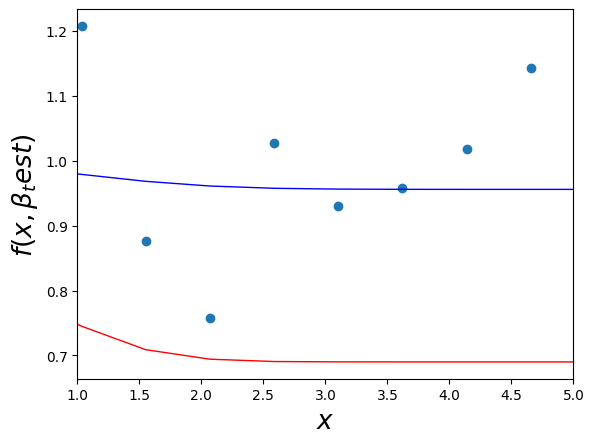

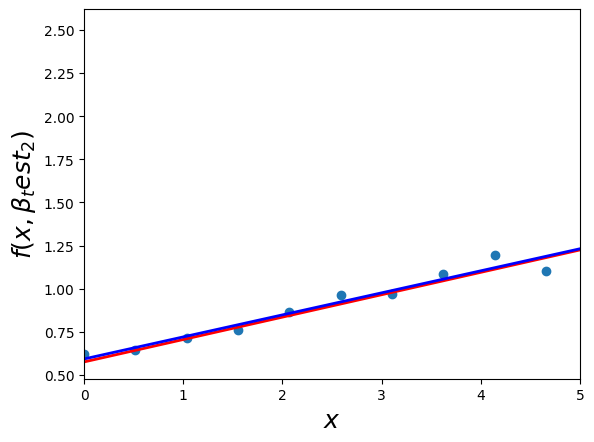

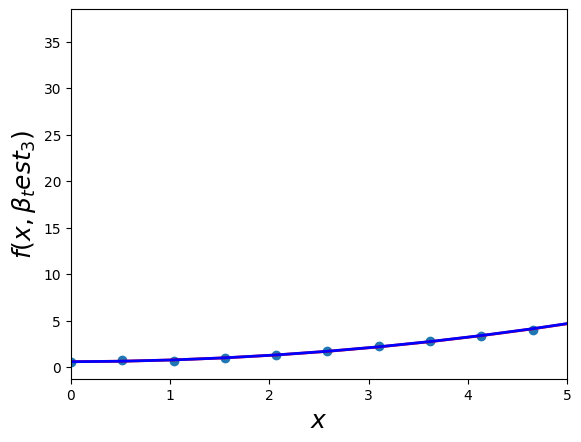

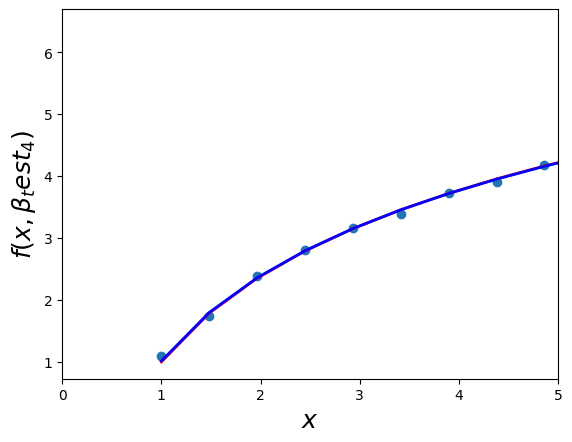

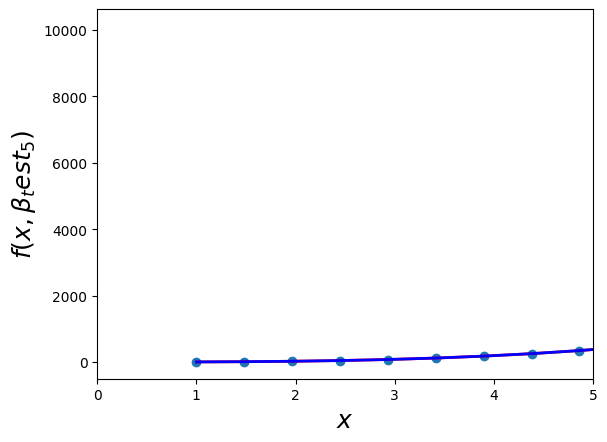

In [26]:
#Задание:
#Подставьте собственные данные и поэкспериментируйте с представленными
#функциями. Проанализируйте динамику изменения данных.
##0
beta_test = (random(), random(), random())

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 15, 30)
y = f(xdata, *beta_test)
ydata = y + 0.5 * np.random.rand(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=1)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=1)
ax.set_xlim(1, 5)
ax.set_xlabel(r"$x$", fontsize=19)
ax.set_ylabel(r"$f(x, \beta_test)$", fontsize=19)
plt.show()

##1
beta_test_2 = (random(), random())
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 15, 30)
y = f(xdata, *beta_test_2)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
line_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta_test_2)$", fontsize=18)
plt.show()\

##2
beta_test_3 = (random(), random(), random())
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
xdata = np.linspace(0, 15, 30)
y = f(xdata, *beta_test_3)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta_test_3)$", fontsize=18)
plt.show()

##3
beta_test_4 = (randint(1, 4), randint(1, 4))
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 15, 30)
y = f(xdata, *beta_test_4)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta_test_4)$", fontsize=18)
plt.show()

##4
beta_test_5 = (randint(1, 3), randint(1, 3))
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(1, 15, 30)
y = f(xdata, *beta_test_5)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta_test_5)$", fontsize=18)
plt.show()

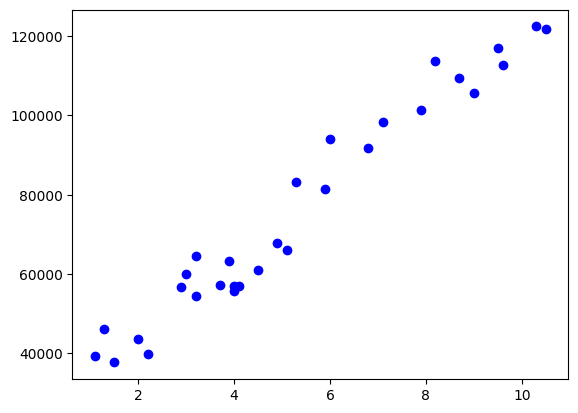

26780.09915062818 [9312.57512673]


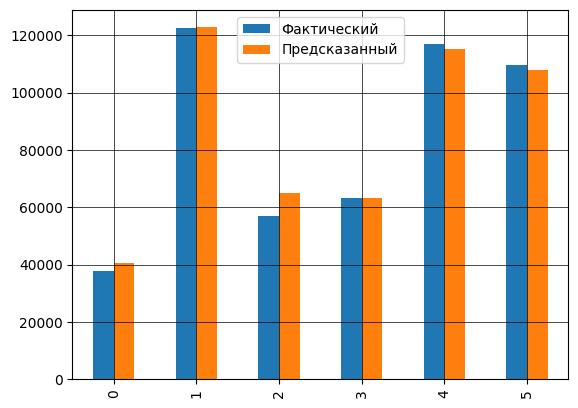

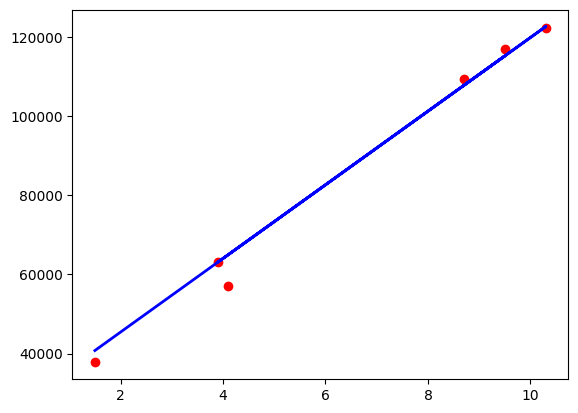

In [46]:
#Задание:
#Постройте модель линейной регрессии для произвольных данных из двух
#столбцов. Для примера можно взять точечную зависимость заработной платы от
#опыта работы:
#(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
#Найдите коэффициенты линии регрессии. Постройте прогноз

dataset = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
dataset.head()
dataset.describe()

plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "Работник")
plt.xlabel = "Зарплата" 
plt.ylabel = "Стаж работы"
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_,regressor.coef_)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Фактический': y_test, 'Предсказанный': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=2)
plt.show()

In [57]:
#Задача:
#Постройте модель множественной линейной регрессии для произвольных
#данных из нескольких столбцов. Для примера можно взять потребления
#газа (в миллионах галлонов) в 48 штатах США или набор данных о
#качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
#множественной регрессии. Постройте прогноз
#1.https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
#2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv - НЕ работает

dataset = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
dataset.head()
print(dataset.shape,'\n')
dataset.describe()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


df1 = pd.DataFrame(y)
df2 = pd.DataFrame(X)

df1 = df1.rename(columns = {0: 'Ptrlприемник'}, inplace = False)
df2 = df2.rename(columns = {0: 'Ptrlтакс', 1: 'Среднее значение', 2: 'Автомобильные дороги ПВД', 3: 'Лицензия PPTNDRVR(%)'}, inplace = False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print("Налог на бензин, средний доход, дороги с твёрдым покрытием, водительские права населения (%), расход бензина",'\n',dataset,'\n')

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Коэффициент'])
print(coeff_df,'\n')

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Фактический': y_test, 'Предсказанный': y_pred})
print(df,'\n')

print('Среднее значение в квадрате Error:', metrics.mean_squared_error(y_test, y_pred))


(48, 5) 

Налог на бензин, средний доход, дороги с твёрдым покрытием, водительские права населения (%), расход бензина 
     Ptrlприемник  Ptrlтакс  Среднее значение  Автомобильные дороги ПВД  \
0            541      9.00            3571.0                    1976.0   
1            524      9.00            4092.0                    1250.0   
2            561      9.00            3865.0                    1586.0   
3            414      7.50            4870.0                    2351.0   
4            410      8.00            4399.0                     431.0   
5            457     10.00            5342.0                    1333.0   
6            344      8.00            5319.0                   11868.0   
7            467      8.00            5126.0                    2138.0   
8            464      8.00            4447.0                    8577.0   
9            498      7.00            4512.0                    8507.0   
10           580      8.00            4391.0                    5

Полином первой степени (вариант 1):
 
-0.4286 x + 4.381
Полином второй степени (вариант 1):
        2
-7.143 x + 6.714 x + 3.429

Полином первой степени (вариант 2):
 
1.143 x + 4.429
Полином второй степени (вариант 2):
       2
5.357 x - 4.214 x + 5.143


TypeError: 'str' object is not callable

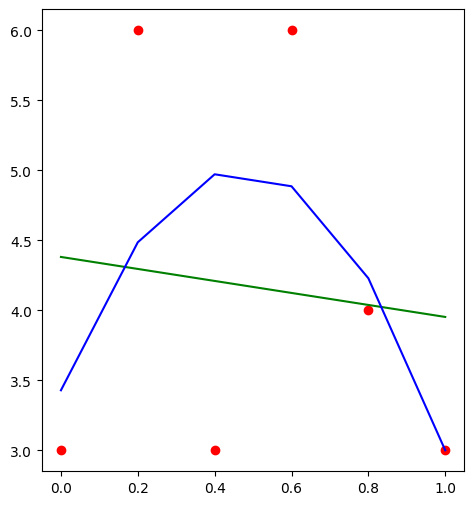

In [73]:
#Задача: Экспериментально получены N − значений величины Y при
#различных значениях величины X. Построить полиномы первой и второй
#степени, аппроксимирующие результаты эксперимента, с применением
#метода наименьших квадратов. Результаты выводятся в виде таблиц
#значений и графиков, полученных полиномов.
#Вариант 1
x1 = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y1 = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])

z1_1 = np.polyfit(x1, y1, 1)
p1_1 = np.poly1d(z1_1)
z1_2 = np.polyfit(x1, y1, 2)
p1_2 = np.poly1d(z1_2)

#Вариант 2

x2 = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y2 = np.array([5.0, 5.0, 4.0, 4.0, 6.0, 6.0])

z2_1 = np.polyfit(x2, y2, 1)
p2_1 = np.poly1d(z2_1)
z2_2 = np.polyfit(x2, y2, 2)
p2_2 = np.poly1d(z2_2)

print("Полином первой степени (вариант 1):")
print(p1_1)
print("Полином второй степени (вариант 1):")
print(p1_2)

print("\nПолином первой степени (вариант 2):")
print(p2_1)
print("Полином второй степени (вариант 2):")
print(p2_2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, color='red', label='Экспериментальные данные')
plt.plot(x1, p1_1(x1), color='green', label='Полином первой степени')
plt.plot(x1, p1_2(x1), color='blue', label='Полином второй степени')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.title('Вариант 1')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, color='red', label='Экспериментальные данные')
plt.plot(x2, p2_1(x2), color='green', label='Полином первой степени')
plt.plot(x2, p2_2(x2), color='blue', label='Полином второй степени')
plt.xlabel('X2')
plt.ylabel('Y2')
plt.title('Вариант 2')
plt.legend()

plt.show()

